## Logistic Regression using Gradient Descent and L2 Regularization on weights

### Importing Libraries

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap 

### Generating synthetic data

In [21]:
np.random.seed(0)

# Generate 20 samples for class 0 centered at (-2, -2)
X_class0 = np.random.randn(20, 2) + np.array([-2, -2])
y_class0 = np.zeros(20)

# Generate 20 samples for class 1 centered at (2, 2)
X_class1 = np.random.randn(20, 2) + np.array([2, 2])
y_class1 = np.ones(20)

# Combine the data and labels
X = np.vstack((X_class0, X_class1))
y = np.hstack((y_class0, y_class1))

# Add a column of ones for the bias term
X = np.hstack((np.ones((X.shape[0], 1)), X))

### Sigmoid function

In [22]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

### Computing cost 

In [23]:
def compute_cost(X, y, weights, lambda_reg):
    m = X.shape[0]
    h = sigmoid(np.dot(X, weights))
    eps = 1e-15
    cost = - (1/m) * (np.dot(y, np.log(h + eps)) + np.dot((1 - y), np.log(1 - h + eps)))
    reg_term = (lambda_reg / (2 * m)) * np.sum(weights[1:] ** 2)
    return cost + reg_term

### Logistic Regression function

In [24]:
def logistic_regression(X, y, eta, num_iterations, lambda_reg):
    
    num_samples = X.shape[0]
    num_features = X.shape[1]
    weights = np.zeros(num_features)
    
    for _ in range(num_iterations):
        predictions = sigmoid(np.dot(X, weights))  
        error = predictions - y                   
        gradient = (1 / num_samples) * (np.dot(X.T, error) + lambda_reg * weights)
        weights -= eta * gradient  # Update weights using gradient descent
    
    return weights

### Training the model

In [25]:
learning_rate = 0.01
num_iterations = 1000
lambda_reg = 1.0

w = logistic_regression(X, y, learning_rate, num_iterations, lambda_reg)

### Colormap

In [26]:
from matplotlib.colors import LinearSegmentedColormap

# Define custom color transition: red → white → blue
color_sequence = [(1, 0, 0), (1, 1, 1), (0, 0, 1)]  # RGB tuples

# Set the number of color shades (smoother transitions with more bins)
num_shades = 100

# Give a name to your custom colormap
custom_cmap_name = "red_white_blue"

# Create the colormap object
custom_cmap = LinearSegmentedColormap.from_list(custom_cmap_name, color_sequence, N = num_shades)

### Generating Grid and Predicting Probabilities for Decision Boundary Plot

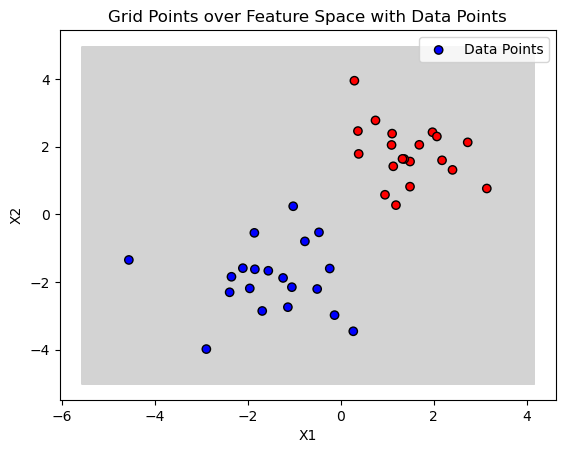

In [27]:
# Define grid limits based on X1 and X2 features
X1_min, X1_max = X[:, 1].min() - 1, X[:, 1].max() + 1
X2_min, X2_max = X[:, 2].min() - 1, X[:, 2].max() + 1

# Create a dense mesh grid over the feature space
X1_grid, X2_grid = np.meshgrid(
    np.arange(X1_min, X1_max, 0.01),
    np.arange(X2_min, X2_max, 0.01)
)

# Flatten grid points and add bias term for prediction
grid_input = np.c_[np.ones(X1_grid.ravel().shape), X1_grid.ravel(), X2_grid.ravel()]

# Compute predicted probabilities on the grid (optional if you want)
Z = sigmoid(np.dot(grid_input, w))
Z = Z.reshape(X1_grid.shape)

# Plot grid points as light gray small dots (no legend to avoid warning)
plt.scatter(X1_grid, X2_grid, s = 1, color = 'lightgray')

# Plot original data points colored by class with legend
plt.scatter(X[:, 1], X[:, 2], c = y, cmap = 'bwr', edgecolors = 'k', label = 'Data Points')

# Add labels, title, and fixed legend location
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Grid Points over Feature Space with Data Points')
plt.legend(loc = 'upper right')

plt.show()

### Plotting Decision Boundary and Data Points with Probability Contours

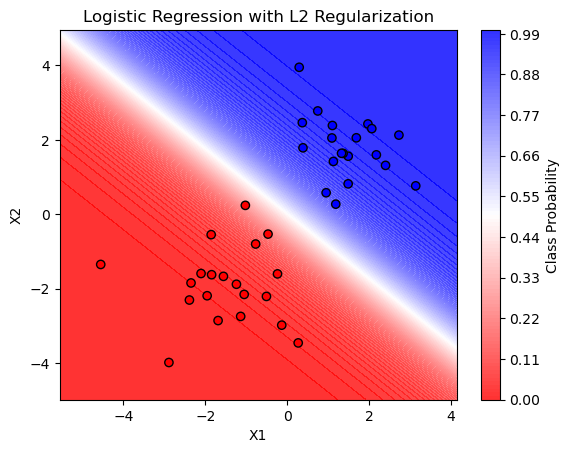

In [28]:
# Plot probability contours using the custom colormap
contour = plt.contourf(xx, yy, Z, cmap=cm, alpha=0.8, levels=np.linspace(0, 1, 101))

# Overlay original data points colored by class
plt.scatter(X[:, 1], X[:, 2], c=y, cmap=cm, edgecolors='k', linewidths=1)

# Add colorbar to show class probability scale
cbar = plt.colorbar(contour)
cbar.set_label('Class Probability')

# Set axis labels and plot title
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Logistic Regression with L2 Regularization')

plt.show()